# Library Import

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data

Using Dataset
- [Credit Card Fraud Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- [credit card default payment](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

In [3]:
fraud_data = pd.read_csv('creditcard.csv')

In [10]:
fraud_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [14]:
print("Rows    : ", fraud_data.shape[0])
print("Columns : ", fraud_data.shape[1])

Rows    :  11959
Columns :  31


In [26]:
fraud_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [16]:
print("Class Rate")
print("Class 0 : ", sum(fraud_data['Class'] == 0))
print("Class 1 : ", sum(fraud_data['Class'] == 1))

Class Rate
Class 0 :  11906
Class 1 :  52


In [5]:
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,-0.285865,0.820266,-1.442642,0.934682,0.782071,-0.179180,-0.024968,0.379550,-0.022419,-0.065877,0.022534,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,1.173549,1.183516,1.542860,1.185540,1.297608,0.985644,0.926829,1.106732,0.827064,0.825127,0.575860,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,-0.734696,0.013157,-2.434287,0.096362,0.181975,-0.773601,-0.510494,-0.104358,-0.463891,-0.554455,-0.155358,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,-0.361219,0.771773,-1.778586,1.015535,1.047427,-0.042979,0.051214,0.372768,0.031698,-0.064862,-0.031566,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,0.147961,1.631154,-0.131637,1.821011,1.530422,0.505024,0.542400,0.863136,0.477780,0.462036,0.147281,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [19]:
fraud_data.loc[11958,:]

Time      20642.000000
V1            1.291096
V2           -0.226628
V3            0.708386
V4           -0.719236
V5           -0.659099
V6           -0.273757
V7           -0.612042
V8           -0.111488
V9            3.032258
V10          -1.478965
V11          -0.094403
V12          -1.584022
V13           2.609250
V14           1.066208
V15           0.502725
V16          -0.266146
V17           0.233377
V18           0.631159
V19           0.660224
V20                NaN
V21                NaN
V22                NaN
V23                NaN
V24                NaN
V25                NaN
V26                NaN
V27                NaN
V28                NaN
Amount             NaN
Class              NaN
Name: 11958, dtype: float64

In [20]:
fraud_data['Class'] == 0

0         True
1         True
2         True
3         True
4         True
         ...  
11954     True
11955     True
11956     True
11957     True
11958    False
Name: Class, Length: 11959, dtype: bool

In [21]:
fraud_data['Class'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
11954    False
11955    False
11956    False
11957    False
11958    False
Name: Class, Length: 11959, dtype: bool

In [22]:
sum(fraud_data['Class'] == 0) + sum(fraud_data['Class'] == 1)

11958

In [27]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [50]:
data = fraud_data.iloc[:-1]

In [65]:
col = list(np.array(data.columns))

col.remove('Time')
col.remove('Amount')

print(col)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']


In [67]:
data = data[col]

# data clustering

In [68]:
from sklearn.cluster import KMeans

In [69]:
train = data.iloc[:-20]
test = data.iloc[-20:]

In [70]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(train)

In [71]:
kmeans.labels_

array([ 5,  7,  5, ..., 10,  1, 10], dtype=int32)

In [72]:
kmeans.predict(test)

array([ 1, 10,  4,  4, 11,  1, 10, 10,  6,  1,  4,  1, 10,  3, 10,  8,  6,
        1,  4, 10], dtype=int32)

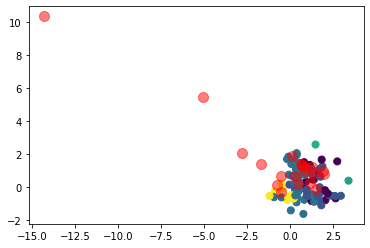

In [93]:
import matplotlib.pyplot as plt

plt.scatter(train.iloc[:100, 2], train.iloc[:100, 10], c=kmeans.predict(train.iloc[:100]), s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 10], c='red', s=100, alpha=0.5)

In [75]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
scaler.fit(train)

scaling_train = scaler.transform(train)
scaling_test = scaler.transform(test)

In [91]:
kmeans_scaling = KMeans(n_clusters=20, random_state=0).fit(scaling_train)

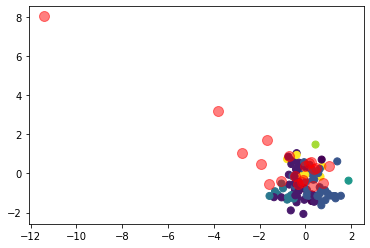

In [92]:
plt.scatter(scaling_train[:100, 2], scaling_train[:100, 10], c=kmeans_scaling.predict(scaling_train[:100]), s=50, cmap='viridis')

centers = kmeans_scaling.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 10], c='red', s=100, alpha=0.5)

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()
scaler.fit(train)

scaling_train = scaler.transform(train)
scaling_test = scaler.transform(test)

In [84]:
kmeans_scaling = KMeans(n_clusters=20, random_state=0).fit(scaling_train)

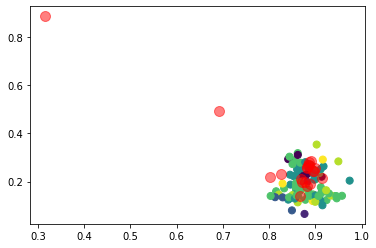

In [89]:
plt.scatter(scaling_train[:100, 2], scaling_train[:100, 10], c=kmeans_scaling.predict(scaling_train[:100]), s=50, cmap='viridis')

centers = kmeans_scaling.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 10], c='red', s=100, alpha=0.5)